<a href="https://colab.research.google.com/github/Frutta111/ML-Algorithms-on-MNIST/blob/main/PART_B_Multinomial_Logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**PART B: Multinomial Logistic regression**



# **Getting depnedncies (and data!)**




## Import relevant libraries



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from datetime import timedelta
import time


##Fetch MNIST Dataset
The MNIST dataset serves as a cornerstone in the domain of digit classification. It comprises a collection of 28x28 pixel grayscale images, each depicting a handwritten digit (0 through 9). Originating from the National Institute of Standards and Technology (NIST).
Key Characteristics of MNIST:
- **Image Size:** Each image is 28 pixels in height and 28 pixels in width, resulting in a total of 784 pixels per image.
- **Grayscale Images**: The images are grayscale, with each pixel represented by a single intensity value ranging from 0 (black) to 255 (white).
- **Handwritten Digits**: The dataset primarily consists of handwritten digits, introducing variations in writing styles, slants, and sizes.
- **Labeling**: Each image is associated with a label (digit from 0 to 9), creating a ten-class classification problem.

In [ ]:
from sklearn.datasets import fetch_openml

# Fetch MNIST dataset
mnist = fetch_openml('mnist_784', version=1)
# Access features (pixel values) and labels
X, y = mnist['data'], mnist['target']

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


#**Data Preparation**

##Data Partitioning
Divide the original MNIST dataset into two subsets: a training set containing 60,000 images and a test set containing 10,000 images. The 'train_test_split' function from the scikit-learn module can be employed for this purpose.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000, random_state=42)
print ("The size of X_train is:", X_train.shape)
print ("The size of X_test is:", X_test.shape)

# Normalize features values
X_train = X_train / 255.0
X_test = X_test / 255.0

The size of X_train is: (60000, 784)
The size of X_test is: (10000, 784)


##Label and Image Transformation
**One-Hot Vector Representation**: transform the digit labels into one-hot vectors. Each label, such as '5', will be represented as [0,0,0,0,0,1,0,0,0,0], and '0' will correspond to [1,0,0,0,0,0,0,0,0,0].



In [ ]:
labels_train = y_train.astype(int)
labels_test = y_test.astype(int)

# Number of classes (digits 0-9)
num_classes = 10

# Transform labels to one-hot vectors
one_hot_labels_train = np.zeros((len(labels_train), num_classes))
one_hot_labels_train[np.arange(len(labels_train)), labels_train] = 1

one_hot_labels_test = np.zeros((len(labels_test), num_classes))
one_hot_labels_test[np.arange(len(labels_test)), labels_test] = 1

print(one_hot_labels_train.shape)


(60000, 10)


**Flattening Images**: Flatten the input images to create a vector representation. Each original image, initially of size 28x28 pixels, should be transformed into a vector of size 785x1. The first component of this vector represents the bias term and is set to 1.

In [ ]:
# Flattening input images and adding bias term
num_samples_train = X_train.shape[0]
num_samples_test = X_test.shape[0]
image_size = X_train.shape[1]  # Image size before flattening (28x28 = 784 pixels)

# Flatten training set
X_train_flattened = np.c_[np.ones((num_samples_train, 1)), X_train]  # Add bias term (column of 1s)
X_train_flattened = X_train_flattened.reshape(num_samples_train, image_size + 1)  # Reshape to 785x1

# Flatten test set
X_test_flattened = np.c_[np.ones((num_samples_test, 1)), X_test]  # Add bias term (column of 1s)
X_test_flattened = X_test_flattened.reshape(num_samples_test, image_size + 1)  # Reshape to 785x1

# Display the shape of the flattened datasets
print("Flattened Training Data Shape:", X_train_flattened.shape)
print("Flattened Test Data Shape:", X_test_flattened.shape)


Flattened Training Data Shape: (60000, 785)
Flattened Test Data Shape: (10000, 785)


#**PART B: Softmax regression**




The function returns the updated weights (self.W) after completing the training loop. This final set of weights represents the learned parameters of softmax regression model, which can be used for making predictions on new data using the 'predict' method.The training process involves iteratively adjusting the weights based on the gradient of the cross-entropy loss, facilitating convergence towards optimal values. Adjustments are made using the specified learning rate and continue until the convergence criteria are met or the maximum number of epochs is reached.

**Input Data Shape:**
The X_train_flattened should be a 2D array where each row represents a data point, and one_hot_labels_train should be a one-hot encoded matrix.

**Initialization of Weights:**
You can initializie weights to zeros ('init_value=0') or  with random initialization  ('init_value=1') .

**Training Loop:**  Include convergence criteria to halt training if the loss converges, typically indicated by the gradient norm approaching zero or reaching a plateau. This strategy helps avoid unnecessary computations

**Printing Loss:** Printing the training loss at each epoch



In [ ]:
class SoftmaxReg :
  def __init__(self, num_features, num_classes, learning_rate, num_epochs , epsilon , init_value ):

        # set initial value for the weights
        if init_value == 0 :
          self.W  = np.zeros((num_features , num_classes))  # Initialize weights to 0
        else:
          self.W = np.random.randn(num_features, num_classes)  # Initialize weights to random numbers

        self.num_epochs = num_epochs
        self.learning_rate = learning_rate
        self.epsilon = epsilon
        self.E_in = []
        self.E_out = []

# Y_train - 60000 X 10
# X_train - 60000 X 785
# W - 785 X 10

  def softmax(self , x):
      exp_wx = np.exp(x @ self.W)
      y_pred = exp_wx / np.sum(exp_wx, axis=1, keepdims=True)
      return y_pred

  def cross_entropy(self, y_pred, y_true): #y_true must be one-hot lable matrix
        log_p = - np.log(y_pred)
        losses = log_p[y_true == 1] # Get elements of -log(p) where elements in y_true are equal to 1
        loss =  np.sum(losses) / y_pred.shape[0]  #cross entropy loss normalized by the size of training set
        #loss = -np.sum(y_true * np.log(y_pred))
        #print(f'loss:{loss}\n')
        return loss

  def predict(self, x):
      activation = self.softmax(x)
      prediction =  np.argmax(activation, axis=1)
      return prediction

  def accuracy(self, y_pred, y_true):
    correctly_predicted = np.sum(np.argmax(y_pred, axis = 1) == np.argmax(y_true, axis = 1))
    acc = (100.0 * correctly_predicted) / y_pred.shape[0]
    return acc

  def plot_loss(self): # Plotting the losses on the same graphs
    # plt.figure(figsize=(18, 6))
    plt.plot(self.E_in, label='E_in', color='blue')
    plt.plot(self.E_out, label='E_out', color='red')
    # Set plot labels and title
    plt.xlabel('Iteration Number')
    plt.ylabel('Loss')
    plt.title(f'Cross Entropy Loss of Softmax Regression Classification')
    plt.legend()
    plt.show()

  def train(self, X_train , y_train, X_test , y_test):
    epoch = 0

    # calculate predictions and loss based on initial values
    y_pred = self.softmax(X_train)
    train_loss = self.cross_entropy(y_pred, y_train)
    self.E_in.append(train_loss)

    y_pred_test =  self.softmax(X_test)
    test_loss = self.cross_entropy(y_pred_test, y_test)
    self.E_out.append(test_loss)

    while epoch < self.num_epochs -  1 :

      # Calculate softmax predictions
      y_pred = self.softmax(X_train)

      # Calculate gradient of the cross-entropy loss
      gradient = X_train.T @ (y_pred - y_train)  / y_train.shape[0]

      # Update weights using gradient descent
      self.W -= self.learning_rate * gradient

      # Calculate predictions and loss
      y_pred = self.softmax(X_train)
      train_loss = self.cross_entropy(y_pred, y_train)
      self.E_in.append(train_loss)

      y_pred_test =  self.softmax(X_test)
      test_loss = self.cross_entropy(y_pred_test, y_test)
      self.E_out.append(test_loss)

      # Check for convergence
      #if np.abs(self.E_in[epoch] - self.E_in[epoch + 1]) <  self.epsilon:
      if self.E_in[epoch + 1] <  self.epsilon:
          print(f'Converged. Stopping training.')
          break


      epoch += 1

    acc_training = self.accuracy(y_pred, y_train)
    acc_test = self.accuracy(y_pred_test, y_test)
    print(f'Epoch {epoch + 1}, Training Loss: {self.E_in[-1]:.4f} , Test Loss: {self.E_out[-1]:.4f}')
    print(f'Epoch {epoch + 1}, Training Accuracy: {acc_training:.2f}% , Test Accuracy: {acc_test:.2f}%')

    return self.W



### Model evaluation and performance visualization utilities

In [ ]:
# Create confusion matrix for multinomial classification

def multi_confusion_matrix(y_true, y_pred, class_labels=None, figsize=(18, 6), title="Confusion Matrix"):
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Calculate metrics: Accuracy
    total = np.sum(conf_matrix)
    accuracy = np.trace(conf_matrix) / float(total)

    # Plot confusion matrix using seaborn heatmap
    plt.figure(figsize=figsize)
    sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
                xticklabels=class_labels, yticklabels=class_labels)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title(f'{title}\nAccuracy={accuracy*100:.2f}%')
    plt.show()

# Create confusion matrix for per digit using heatmap
def heat_digit_confusion_matrix(y_true, y_pred, num_classes=10):
    for digit in range(num_classes):
        # Create confusion matrix
        conf_matrix = confusion_matrix(y_true[:, digit], y_pred[:, digit])

        # Calculate metrics: Accuracy, TPR, TNR
        total = np.sum(conf_matrix)
        accuracy = np.trace(conf_matrix) / float(total)  # ACC = (TP + TN) / (TP + TN + FP + FN)
        tpr = conf_matrix[1, 1] / float(np.sum(conf_matrix[1, :]))  # TPR = TP / (TP + FN)
        tnr = conf_matrix[0, 0] / float(np.sum(conf_matrix[0, :]))  # TNR = TN / (TN + FP)

        # Plot confusion matrix using seaborn heatmap
        sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d',
                    xticklabels=['Class 0', 'Class 1'],
                    yticklabels=['Class 0', 'Class 1'],
                    cbar=digit == num_classes - 1)  # Show colorbar only for the last subplot
        plt.xlabel('Predicted')
        plt.ylabel('True')
        plt.title(f'Digit {digit}\nAcc={accuracy*100:.2f}%, TPR={tpr*100:.2f}%, TNR={tnr*100:.2f}%')
        plt.show()

# Create confusion matrix for per digit - in a compact display
def digit_confusion_matrix(y_true, y_pred, num_classes=10):
    for digit in range(num_classes):
        # Create confusion matrix
        conf_matrix = confusion_matrix(y_true[:, digit], y_pred[:, digit])

        # Calculate metrics: Accuracy, TPR, TNR
        total = np.sum(conf_matrix)
        accuracy = np.trace(conf_matrix) / float(total)  # ACC = (TP + TN) / (TP + TN + FP + FN)
        tpr = conf_matrix[1, 1] / float(np.sum(conf_matrix[1, :]))  # TPR = TP / (TP + FN)
        tnr = conf_matrix[0, 0] / float(np.sum(conf_matrix[0, :]))  # TNR = TN / (TN + FP)

        print(f'\nDigit {digit}: Acc={accuracy*100:.2f}%, TPR={tpr*100:.2f}%, TNR={tnr*100:.2f}%')
        print(conf_matrix)

## **Results and discussion**
I ran the model several times, each time I used different hyperparametrs.

This document presents the results of two implementations that gave the best results for a different initialization of the weights w. I chose the parameters heuristically.

In both settings there is no overfitting, the error on the training and test data as a function of the number of iterations decreases accordingly and the values ​​all along are very similar.The LOSS function is smoother when the weights are initialized with random numbers

1.   **First case:** initializing the weights to 0 gave good performance on 100 epochs and learning rate = 1. Convergence has been achieved. running time: 83 seconds
with,
Training Loss: 0.3425 , Test Loss: 0.3487
Training Accuracy: 90.48% , Test Accuracy: 90.38%

2.   **Second case:** initializing the weights to random numbers gave good performance on 1000 epochs and learning rate = 1.3. Convergence has been achieved. running time: 829.69 seconds.
with
Training Loss: 0.3912 , Test Loss: 0.4276
Training Accuracy: 90.03% , Test Accuracy: 89.31%
(for 100 epochs the indices were partly lower and with accutacy of 82.25%)


**Conclusions**

The first case gave slightly better performance than the second case.

For both realizations the confusion matrix of the multi-class classification indicates a successful classification. It is evident that compared to other pairs, the model has more difficulty (but to a very small absolute extent) deciding between the pair of digits (4,9) , (5,3) and (8,3) . In the scond case also (7,9).

In the Fisrt case, for each digit separately, the accuracy rate and the selectivity rate(TNR) are very high and stand at 98% or higher. The sensitivity (TPR)  is 90% or higher for all digits except digits 2, 3, 5, 8 for which the index is over 84%. The conclusion is that the digit recognition is very good.

**Overall Conclusion:**

The Softmax, compared to the Perceptron, showed less difficulty in distinguishing between similar digits. The performance for the more problematic digits to predict, gave better results and is therefore preferred. Apparently, the reason is that in Softmax the estimation of the parameters is done at once for all the digits (purely multiple classes) unlike in Perceptron where the model is trained for each digit separately by One-vs-All method: Train multiple binary classifiers, each one trained to distinguish between one class and the rest of the classes. Therefot, in the Perceptron there are fewer parameters to optimized in each model compared to Softmax.




##Performance visualization and evaluation when initializing W to 0

Epoch 100, Training Loss: 0.3425 , Test Loss: 0.3487
Epoch 100, Training Accuracy: 90.48% , Test Accuracy: 90.38%

Elapsed time: 75.99 seconds


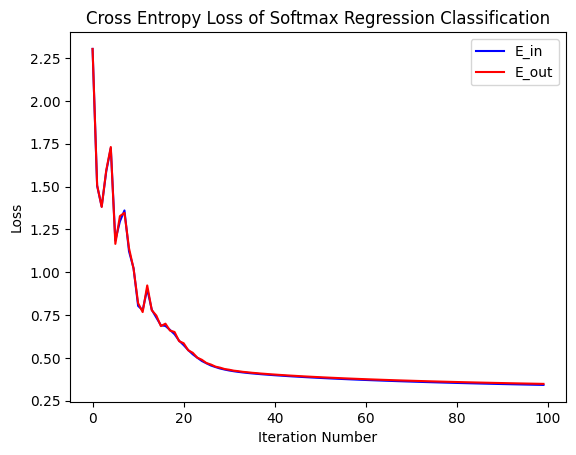

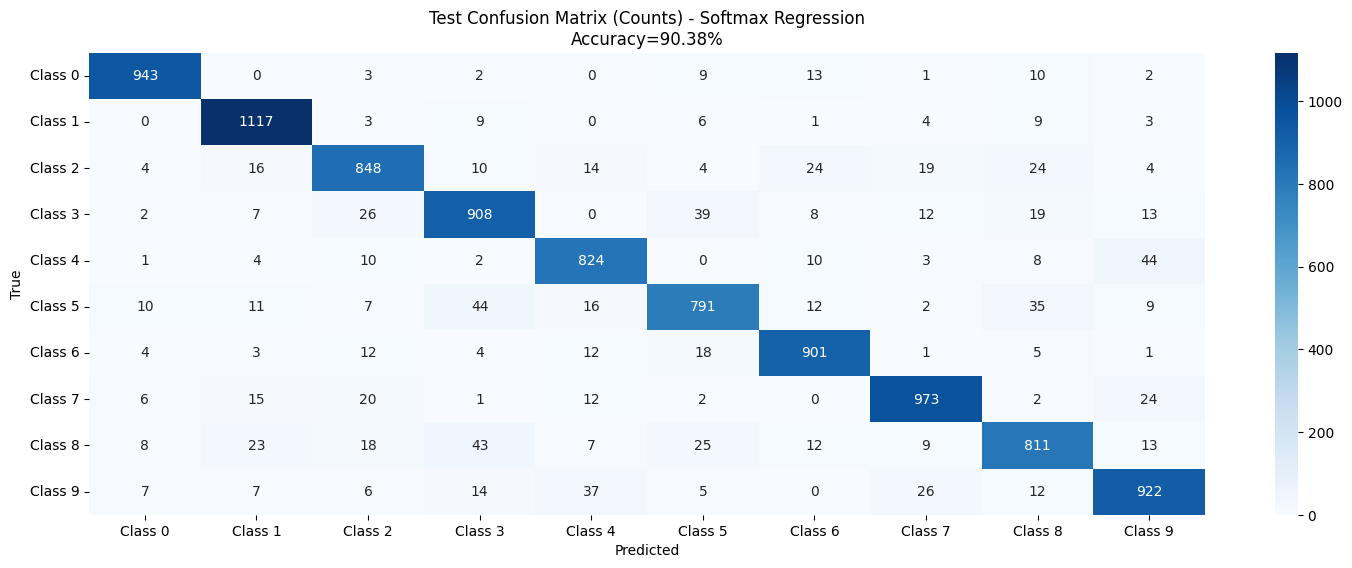


Digit 0: Acc=99.18%, TPR=95.93%, TNR=99.53%
[[8975   42]
 [  40  943]]

Digit 1: Acc=98.79%, TPR=96.96%, TNR=99.03%
[[8762   86]
 [  35 1117]]

Digit 2: Acc=97.76%, TPR=87.69%, TNR=98.84%
[[8928  105]
 [ 119  848]]

Digit 3: Acc=97.45%, TPR=87.81%, TNR=98.56%
[[8837  129]
 [ 126  908]]

Digit 4: Acc=98.20%, TPR=90.95%, TNR=98.92%
[[8996   98]
 [  82  824]]

Digit 5: Acc=97.46%, TPR=84.42%, TNR=98.81%
[[8955  108]
 [ 146  791]]

Digit 6: Acc=98.60%, TPR=93.76%, TNR=99.11%
[[8959   80]
 [  60  901]]

Digit 7: Acc=98.41%, TPR=92.23%, TNR=99.14%
[[8868   77]
 [  82  973]]

Digit 8: Acc=97.18%, TPR=83.69%, TNR=98.63%
[[8907  124]
 [ 158  811]]

Digit 9: Acc=97.73%, TPR=89.00%, TNR=98.74%
[[8851  113]
 [ 114  922]]


In [ ]:
# setup hyperparametrs
num_features = X_train_flattened.shape[1]
num_classes = one_hot_labels_train.shape[1]
learning_rate = 1 #0.00001
num_epochs = 100
epsilon=0.001
init_value = 0 # 0 to initialize w to 0 and  1 to random number

start_time = time.time() # Record the start time

# Create an instance of the softmax_reg class
obj1 = SoftmaxReg(num_features, num_classes, learning_rate, num_epochs,  epsilon, init_value)

# Train the model and get the final weights
weights = obj1.train( X_train_flattened , one_hot_labels_train, X_test_flattened , one_hot_labels_test )

end_time = time.time() # Record the end time
elapsed_time = end_time - start_time # Calculate the elapsed time
print(f"\nElapsed time: {elapsed_time:.2f} seconds") # Print the elapsed time


# Plotting the losses on the same graphs
obj1.plot_loss()

# Calculate test prediction
y_pred = obj1.predict(X_test_flattened)
y_true = labels_test

# Create confusion matrix
multi_confusion_matrix(y_true, y_pred, class_labels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'] , title = "Test Confusion Matrix (Counts) - Softmax Regression")

# create confusion matrix per digit
y_true_one_hot = one_hot_labels_test

# Transform to y_pred binary matrix
num_samples = len(y_pred)
num_classes = 10

y_pred_one_hot = np.zeros((num_samples, num_classes))
y_pred_one_hot[np.arange(num_samples), y_pred] = 1

digit_confusion_matrix(y_true_one_hot, y_pred_one_hot)

##Performance visualization and evaluation when initializing W with random numbers

Epoch 1000, Training Loss: 0.4048 , Test Loss: 0.4505
Epoch 1000, Training Accuracy: 89.93% , Test Accuracy: 88.88%

Elapsed time: 750.61 seconds


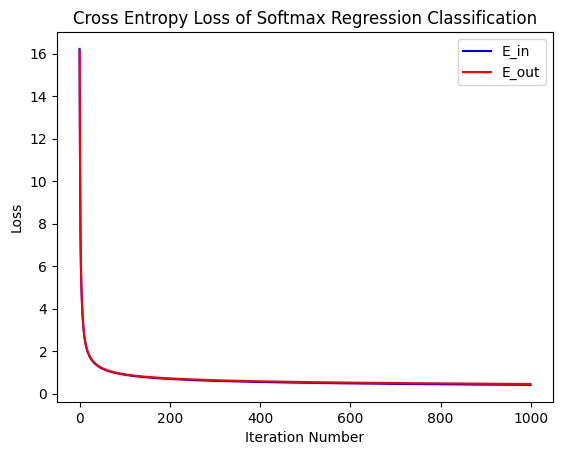

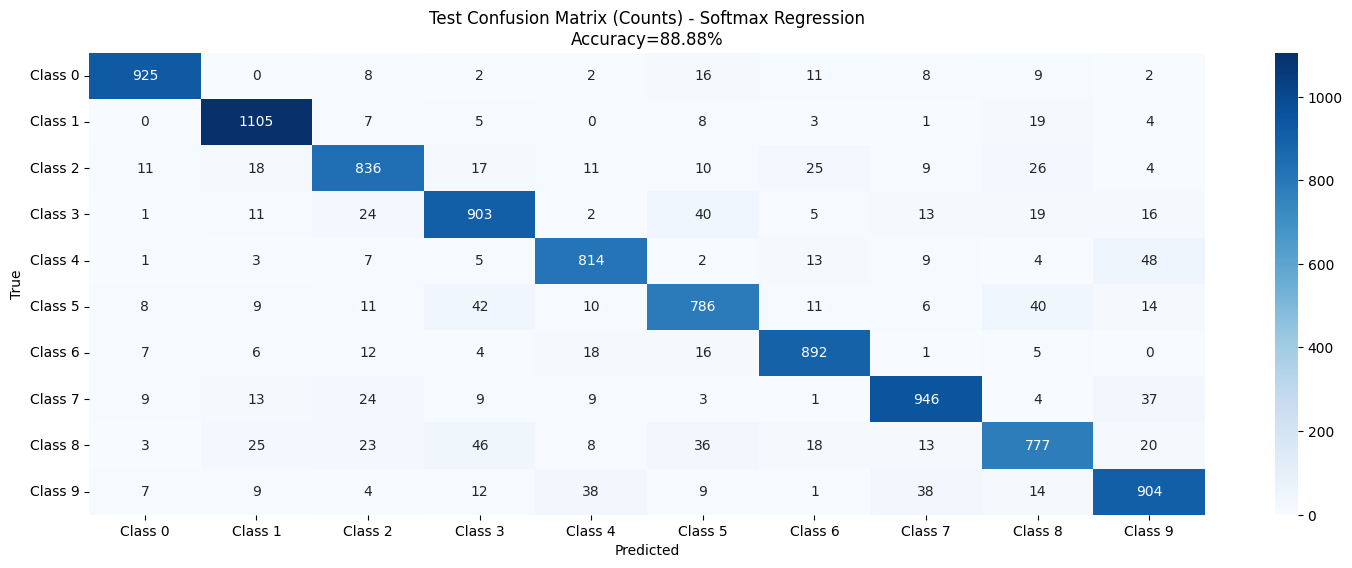


Digit 0: Acc=98.95%, TPR=94.10%, TNR=99.48%
[[8970   47]
 [  58  925]]

Digit 1: Acc=98.59%, TPR=95.92%, TNR=98.94%
[[8754   94]
 [  47 1105]]

Digit 2: Acc=97.49%, TPR=86.45%, TNR=98.67%
[[8913  120]
 [ 131  836]]

Digit 3: Acc=97.27%, TPR=87.33%, TNR=98.42%
[[8824  142]
 [ 131  903]]

Digit 4: Acc=98.10%, TPR=89.85%, TNR=98.92%
[[8996   98]
 [  92  814]]

Digit 5: Acc=97.09%, TPR=83.88%, TNR=98.46%
[[8923  140]
 [ 151  786]]

Digit 6: Acc=98.43%, TPR=92.82%, TNR=99.03%
[[8951   88]
 [  69  892]]

Digit 7: Acc=97.93%, TPR=89.67%, TNR=98.90%
[[8847   98]
 [ 109  946]]

Digit 8: Acc=96.68%, TPR=80.19%, TNR=98.45%
[[8891  140]
 [ 192  777]]

Digit 9: Acc=97.23%, TPR=87.26%, TNR=98.38%
[[8819  145]
 [ 132  904]]


In [ ]:
# setup hyperparametrs
num_features = X_train_flattened.shape[1]
num_classes = one_hot_labels_train.shape[1]
learning_rate = 1.3 #0.00001
num_epochs = 1000
epsilon=0.001
init_value = 1 #0 to initialize w to 0 and  1 to random number

start_time = time.time() # Record the start time

# Create an instance of the softmax_reg class
obj2 = SoftmaxReg(num_features, num_classes, learning_rate, num_epochs,  epsilon, init_value)

# Train the model and get the final weights
weights = obj2.train( X_train_flattened , one_hot_labels_train, X_test_flattened , one_hot_labels_test )

end_time = time.time() # Record the end time
elapsed_time = end_time - start_time # Calculate the elapsed time
print(f"\nElapsed time: {elapsed_time:.2f} seconds") # Print the elapsed time

# Plotting the losses on the same graphs
obj2.plot_loss()

# Calculate test prediction
y_pred = obj2.predict(X_test_flattened)
y_true = labels_test

# Create confusion matrix
multi_confusion_matrix(y_true, y_pred, class_labels=['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4', 'Class 5', 'Class 6', 'Class 7', 'Class 8', 'Class 9'] , title = "Test Confusion Matrix (Counts) - Softmax Regression")

# create confusion matrix per digit
y_true_one_hot = one_hot_labels_test

# Transform to y_pred binary matrix
num_samples = len(y_pred)
num_classes = 10

y_pred_one_hot = np.zeros((num_samples, num_classes))
y_pred_one_hot[np.arange(num_samples), y_pred] = 1

digit_confusion_matrix(y_true_one_hot, y_pred_one_hot)